<a href="https://colab.research.google.com/github/Vijayarajan-S/Fish-Classification-using-CNN/blob/main/Fishclassificationmobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

# Use gdown with the folder link
!gdown --folder https://drive.google.com/drive/folders/1iKdOs4slf3XvNWkeSfsszhPRggfJ2qEd -O /content/Dataset


Retrieving folder contents
Processing file 1GHqB7F1AYocMbiUcqOa4VFtw5mJH0wmb Dataset.zip
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1GHqB7F1AYocMbiUcqOa4VFtw5mJH0wmb
From (redirected): https://drive.google.com/uc?id=1GHqB7F1AYocMbiUcqOa4VFtw5mJH0wmb&confirm=t&uuid=b898b97a-7270-428a-8e9d-b014a677b4bf
To: /content/Dataset/Dataset.zip
100% 271M/271M [00:02<00:00, 102MB/s] 
Download completed


In [ ]:
!unzip '/content/Dataset/Dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/KF3D8XIXVZOD.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/KWS8S1W9I9PG.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/LRPEM4RGWRY7.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/ZHYP7L0380A5.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/LA6K9A1Z300T.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/DSTJ0FNZ17NI.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/8HEN19LAPJGS.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/7UQQICO4NVWK.jpg  
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food gilt_head_bream/OKKCEF9K4K64.jpg  
  in

In [ ]:
import tensorflow as tf

# Set paths
train_dir = "/content/images.cv_jzk6llhf18tm3k0kyttxz/data/train"
val_dir = "/content/images.cv_jzk6llhf18tm3k0kyttxz/data/val"
test_dir = "/content/images.cv_jzk6llhf18tm3k0kyttxz/data/test"

# Load datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),  # resize all images to 224x224
    batch_size=16,
    shuffle=True
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=16,
    shuffle=False
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=16,
    shuffle=False
)


Found 6225 files belonging to 11 classes.
Found 1092 files belonging to 11 classes.
Found 3187 files belonging to 11 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

num_classes = 11  # you have 11 categories

# 1. Define input layer explicitly
inputs = Input(shape=(224, 224, 3))

# 2. MobileNetV2 as feature extractor
base_model = MobileNetV2(include_top=False, weights="imagenet", input_tensor=inputs)
base_model.trainable = False  # freeze base

# 3. Custom top layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation="softmax")(x)

# 4. Final model
model = Model(inputs=inputs, outputs=outputs)

# 5. Compile
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/tmp/ipython-input-2229252275.py:13: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, weights="imagenet", input_tensor=inputs)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 34,378,827 (131.14 MB)

 Trainable params: 32,119,819 (122.53 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

In [ ]:
import datetime
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

# Log directory for TensorBoard
log_dir = "logs/MobileNetV2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Save best model during training
checkpoint_callback = ModelCheckpoint(
    "best_MobileNetV2_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

# Train model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[tensorboard_callback, checkpoint_callback]
)


Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6359 - loss: 1.2406
Epoch 1: val_accuracy improved from -inf to 0.84707, saving model to best_MobileNetV2_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 69s 128ms/step - accuracy: 0.6362 - loss: 1.2394 - val_accuracy: 0.8471 - val_loss: 0.4535
Epoch 2/10
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9167 - loss: 0.2641
Epoch 2: val_accuracy improved from 0.84707 to 0.91392, saving model to best_MobileNetV2_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.9167 - loss: 0.2639 - val_accuracy: 0.9139 - val_loss: 0.2703
Epoch 3/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9591 - loss: 0.1362
Epoch 3: val_accuracy improved from 0.91392 to 0.92308, saving model to best_MobileNetV2_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.9591 - loss: 0.1361 - val_accuracy: 0.9231 - val_loss: 0.2467
Epoch 4/10
388/390 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9764 - loss: 0

In [ ]:
class_names = train_dataset.class_names
print(class_names)

['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "/content/images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food shrimp/00N6DBDOZ8R3.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
img_array = img_array / 255.0  # normalize if your training data was normalized

# Predict
pred_prob1 = model.predict(img_array)
pred_class = np.argmax(pred_prob1, axis=1)
print("Predicted Class:", class_names[pred_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Predicted Class: fish sea_food black_sea_sprat


In [ ]:
test_pred=model.predict(test_dataset)
test_pred=np.argmax(test_pred,axis=1)

200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step


In [ ]:
test_pred

array([ 0,  0,  0, ..., 10, 10, 10])

In [ ]:
model.evaluate(test_dataset)

200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.9660 - loss: 0.1226


[0.12181796878576279, 0.9623470306396484]

200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9660 - loss: 0.1226
Test Loss: 0.1218
Test Accuracy: 0.9623
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step


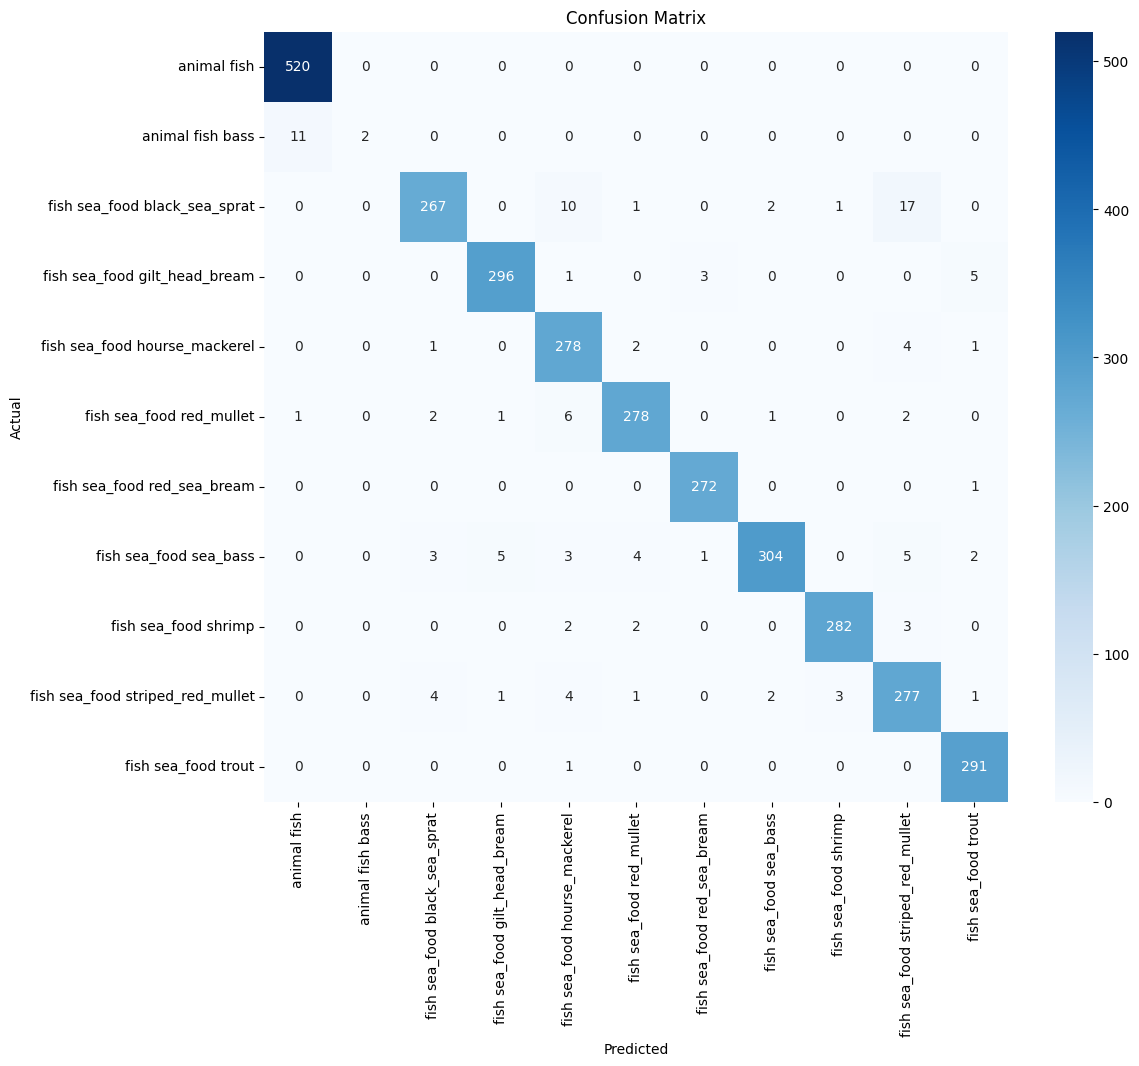

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       520
                animal fish bass       1.00      0.15      0.27        13
   fish sea_food black_sea_sprat       0.96      0.90      0.93       298
   fish sea_food gilt_head_bream       0.98      0.97      0.97       305
   fish sea_food hourse_mackerel       0.91      0.97      0.94       286
        fish sea_food red_mullet       0.97      0.96      0.96       291
     fish sea_food red_sea_bream       0.99      1.00      0.99       273
          fish sea_food sea_bass       0.98      0.93      0.96       327
            fish sea_food shrimp       0.99      0.98      0.98       289
fish sea_food striped_red_mullet       0.90      0.95      0.92       293
             fish sea_food trout       0.97      1.00      0.98       292

                        accuracy                           0.96      3187
             

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Evaluate loss and accuracy
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 2️⃣ Get true labels
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# 3️⃣ Predict classes
pred_probs = model.predict(test_dataset)
pred_classes = np.argmax(pred_probs, axis=1)

# 4️⃣ Confusion matrix
cm = confusion_matrix(y_true, pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.class_names,
            yticklabels=test_dataset.class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 5️⃣ Classification report
print("Classification Report:")
print(classification_report(y_true, pred_classes, target_names=test_dataset.class_names))

# 6️⃣ Prediction counts per class
unique, counts = np.unique(pred_classes, return_counts=True)
print("Predicted Samples Per Class:")
for cls, count in zip(unique, counts):
    print(f"{test_dataset.class_names[cls]}: {count}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

num_classes = 11  # you have 11 categories

# 1. Define input
inputs = Input(shape=(224, 224, 3))

# 2. Create base model and attach to input
base_model = MobileNetV2(include_top=False, weights="imagenet", input_tensor=inputs)

# 3. Fine-tune last 15 layers
base_model.trainable = True
for layer in base_model.layers[:-15]:
    layer.trainable = False

# 4. Add custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation="softmax")(x)

# 5. Build the model
model = Model(inputs=inputs, outputs=outputs)

# 6. Compile with a low learning rate for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/tmp/ipython-input-4062443505.py:13: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, weights="imagenet", input_tensor=inputs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 34,378,827 (131.14 MB)

 Trainable params: 33,159,819 (126.49 MB)

 Non-trainable params: 1,219,008 (4.65 MB)

In [ ]:
import datetime
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

# Log directory for TensorBoard
log_dir = "logs/MobileNetV2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Save best model during training
checkpoint_callback = ModelCheckpoint(
    "best_MobileNetV2_uf_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

# Train model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[tensorboard_callback, checkpoint_callback]
)


Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4167 - loss: 2.0692
Epoch 1: val_accuracy improved from -inf to 0.48810, saving model to best_MobileNetV2_uf_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 60s 117ms/step - accuracy: 0.4171 - loss: 2.0676 - val_accuracy: 0.4881 - val_loss: 1.6114
Epoch 2/10
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8044 - loss: 0.5812
Epoch 2: val_accuracy improved from 0.48810 to 0.65201, saving model to best_MobileNetV2_uf_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.8045 - loss: 0.5809 - val_accuracy: 0.6520 - val_loss: 1.0548
Epoch 3/10
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9004 - loss: 0.3049
Epoch 3: val_accuracy improved from 0.65201 to 0.75824, saving model to best_MobileNetV2_uf_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.9004 - loss: 0.3049 - val_accuracy: 0.7582 - val_loss: 0.7218
Epoch 4/10
388/390 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9462 

200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9627 - loss: 0.1414
Test Loss: 0.1606
Test Accuracy: 0.9514
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step


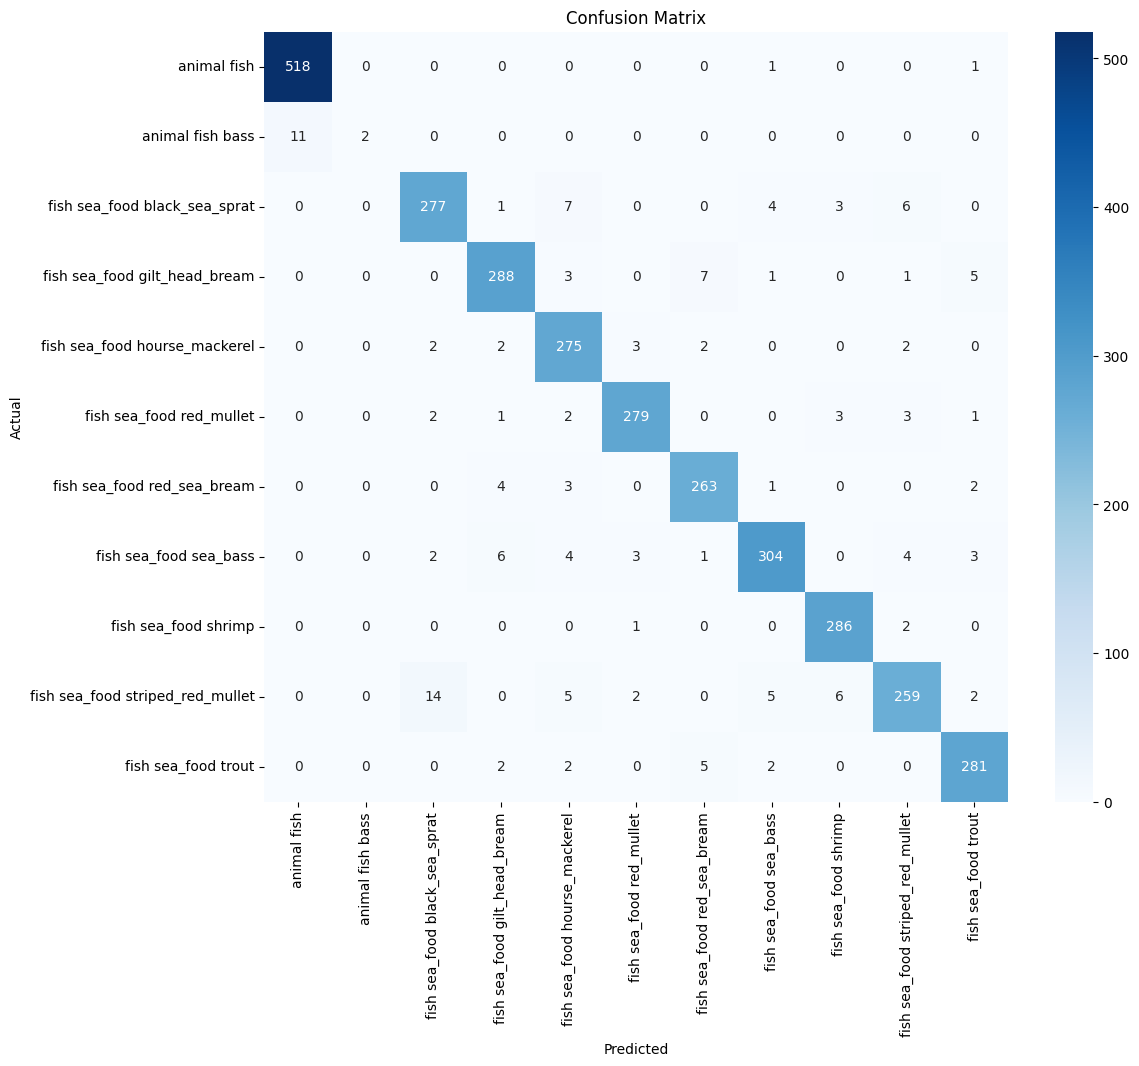

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       520
                animal fish bass       1.00      0.15      0.27        13
   fish sea_food black_sea_sprat       0.93      0.93      0.93       298
   fish sea_food gilt_head_bream       0.95      0.94      0.95       305
   fish sea_food hourse_mackerel       0.91      0.96      0.94       286
        fish sea_food red_mullet       0.97      0.96      0.96       291
     fish sea_food red_sea_bream       0.95      0.96      0.95       273
          fish sea_food sea_bass       0.96      0.93      0.94       327
            fish sea_food shrimp       0.96      0.99      0.97       289
fish sea_food striped_red_mullet       0.94      0.88      0.91       293
             fish sea_food trout       0.95      0.96      0.96       292

                        accuracy                           0.95      3187
             

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Evaluate loss and accuracy
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 2️⃣ Get true labels
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# 3️⃣ Predict classes
pred_probs = model.predict(test_dataset)
pred_classes = np.argmax(pred_probs, axis=1)

# 4️⃣ Confusion matrix
cm = confusion_matrix(y_true, pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.class_names,
            yticklabels=test_dataset.class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 5️⃣ Classification report
print("Classification Report:")
print(classification_report(y_true, pred_classes, target_names=test_dataset.class_names))

# 6️⃣ Prediction counts per class
unique, counts = np.unique(pred_classes, return_counts=True)
print("Predicted Samples Per Class:")
for cls, count in zip(unique, counts):
    print(f"{test_dataset.class_names[cls]}: {count}")


resnet 50

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

num_classes = 11  # 11 categories

# 1. Define input layer
inputs = Input(shape=(224, 224, 3))

# 2. Load ResNet50 base model
base_model = ResNet50(include_top=False, weights="imagenet", input_tensor=inputs)
base_model.trainable = False  # freeze base layers initially

# 3. Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # ✅ better for CNN feature maps than Flatten
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation="softmax")(x)

# 4. Build functional model
model = Model(inputs=inputs, outputs=outputs)

# 5. Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,644,491 (94.01 MB)

 Trainable params: 1,055,755 (4.03 MB)

 Non-trainable params: 23,588,736 (89.98 MB)

In [ ]:
import datetime
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

# Log directory for TensorBoard
log_dir = "logs/MobileNetV2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Save best model during training
checkpoint_callback = ModelCheckpoint(
    "best_resnet_model.keras",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

# Train model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[tensorboard_callback, checkpoint_callback]
)


Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6603 - loss: 1.1220
Epoch 1: val_accuracy improved from -inf to 0.97894, saving model to best_resnet_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 62s 113ms/step - accuracy: 0.6607 - loss: 1.1206 - val_accuracy: 0.9789 - val_loss: 0.0916
Epoch 2/10
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9555 - loss: 0.1512
Epoch 2: val_accuracy improved from 0.97894 to 0.98077, saving model to best_resnet_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.9555 - loss: 0.1511 - val_accuracy: 0.9808 - val_loss: 0.0551
Epoch 3/10
389/390 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9790 - loss: 0.0767
Epoch 3: val_accuracy improved from 0.98077 to 0.99359, saving model to best_resnet_model.keras
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.9790 - loss: 0.0767 - val_accuracy: 0.9936 - val_loss: 0.0263
Epoch 4/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9853 - loss: 0.0582
Epoch 4: 

200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.9951 - loss: 0.0188
Test Loss: 0.0132
Test Accuracy: 0.9975
200/200 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step


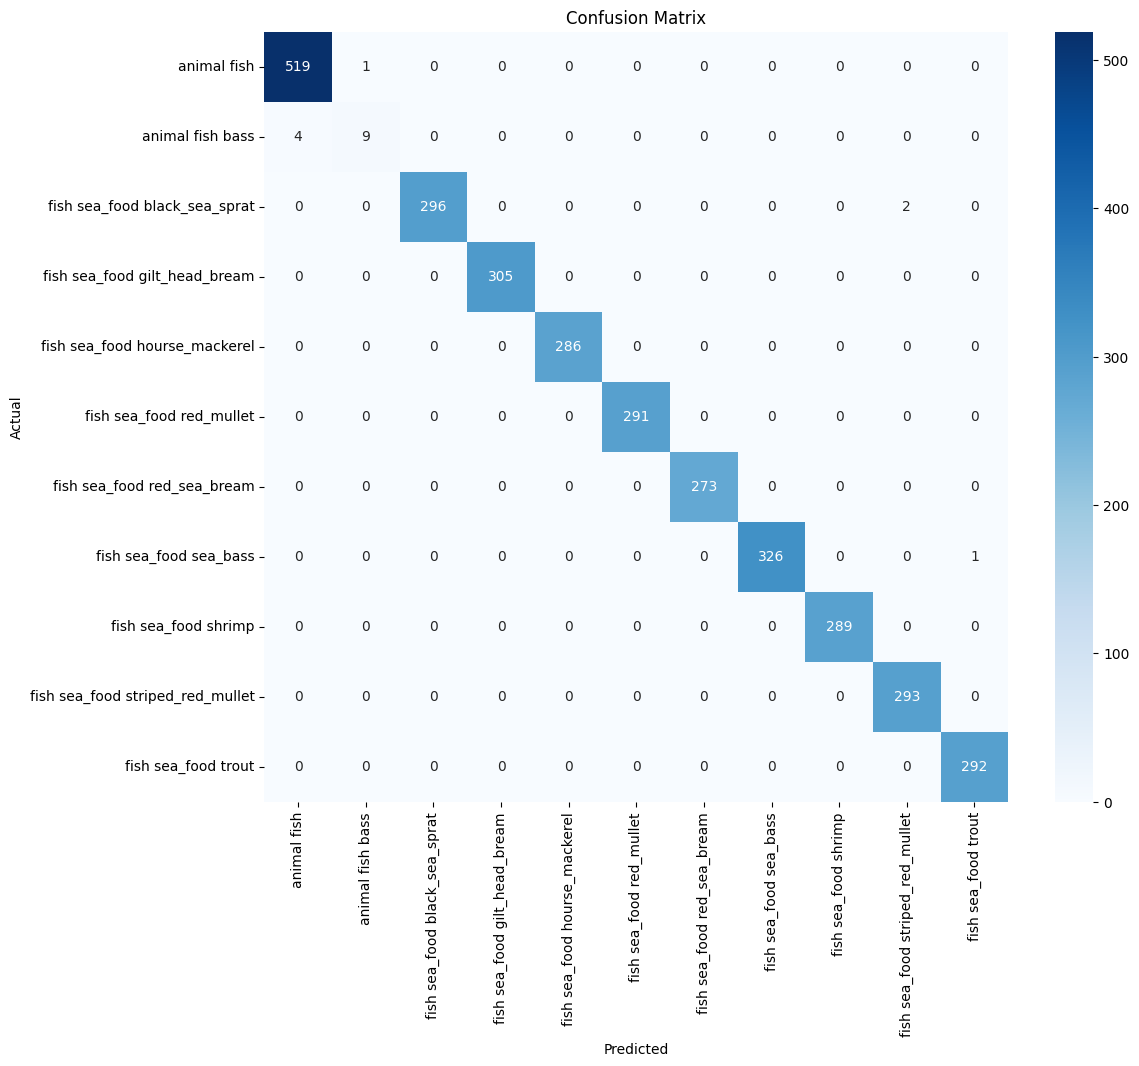

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.99      1.00      1.00       520
                animal fish bass       0.90      0.69      0.78        13
   fish sea_food black_sea_sprat       1.00      0.99      1.00       298
   fish sea_food gilt_head_bream       1.00      1.00      1.00       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.99      1.00      1.00       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy                           1.00      3187
             

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Evaluate loss and accuracy
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 2️⃣ Get true labels
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# 3️⃣ Predict classes
pred_probs = model.predict(test_dataset)
pred_classes = np.argmax(pred_probs, axis=1)

# 4️⃣ Confusion matrix
cm = confusion_matrix(y_true, pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.class_names,
            yticklabels=test_dataset.class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 5️⃣ Classification report
print("Classification Report:")
print(classification_report(y_true, pred_classes, target_names=test_dataset.class_names))

# 6️⃣ Prediction counts per class
unique, counts = np.unique(pred_classes, return_counts=True)
print("Predicted Samples Per Class:")
for cls, count in zip(unique, counts):
    print(f"{test_dataset.class_names[cls]}: {count}")
